In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

data = pd.read_excel('CompanyProfit.xlsx')
data

,Year,Profit
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


<Axes: xlabel='Year'>

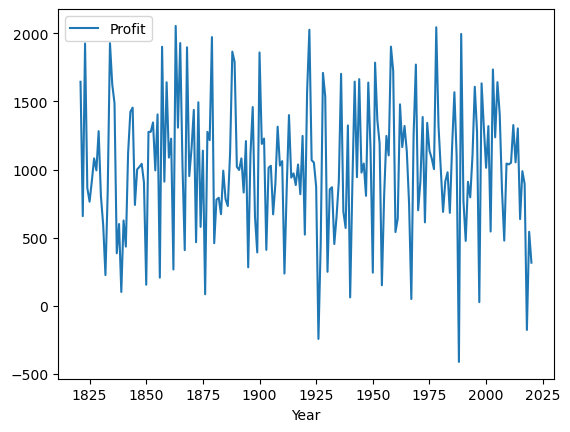

In [20]:
data.plot("Year","Profit")

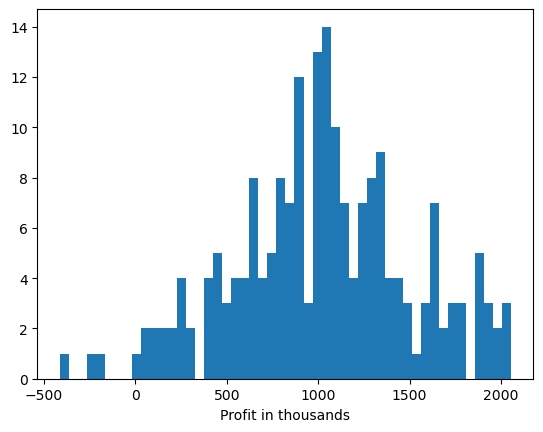

In [52]:

plt.hist(data["Profit"],bins=50,histtype='stepfilled')
plt.xlabel("Profit in thousands")

plt.show()

In [40]:
sigma = np.std(data["Profit"])
print('Std: ', sigma)
mu = np.mean(data["Profit"])
print('Mean: ', mu)
min = np.min(data["Profit"])
print('Min: ', min)
max = np.max(data["Profit"])
print('Max: ', max)
mediana = np.median(data["Profit"])
print('Median: ', mediana)
var = sigma**2
print('Variance: ', var)

Std:  486.73420868067205
Mean:  1021.99
Min:  -413
Max:  2055
Median:  1024.0
Variance:  236910.1899


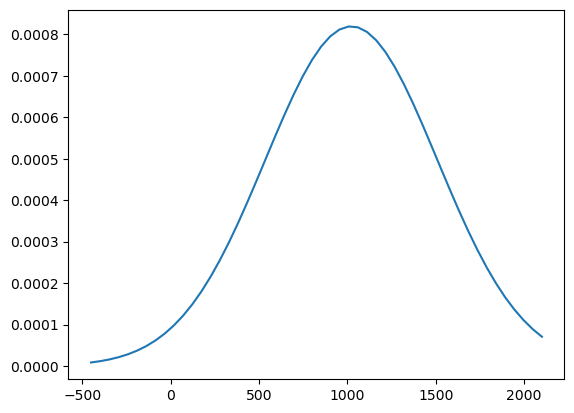

In [33]:
x = np.linspace(-450,2100)
npd1 = stats.norm(mu,sigma)
plt.plot(x,npd1.pdf(x))
plt.show()

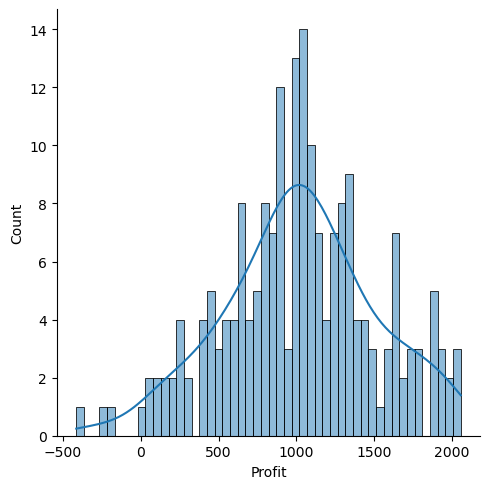

In [54]:
import seaborn as sns
sns.displot(data["Profit"], kde=True, bins=50)

In [22]:
from scipy.stats import chi2_contingency

data_interim=data[['Year', 'Profit']]

data_cont=pd.crosstab(data_interim['Year'], data_interim['Profit'])
data_cont
stat, p, dof, expected = chi2_contingency(data_cont)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    
    print('Dependent (reject H0)')
    
else:
    print('Independent (H0 holds true)')

p value is 0.246694753748636
Independent (H0 holds true)


In [6]:
print(data['Year'].corr(data['Profit']))

-0.021733721913672604


Text(0.5, 1.0, 'Stats:0.990578830242157 ,  p:0.21675562858581543  , Rozklad normalny.')

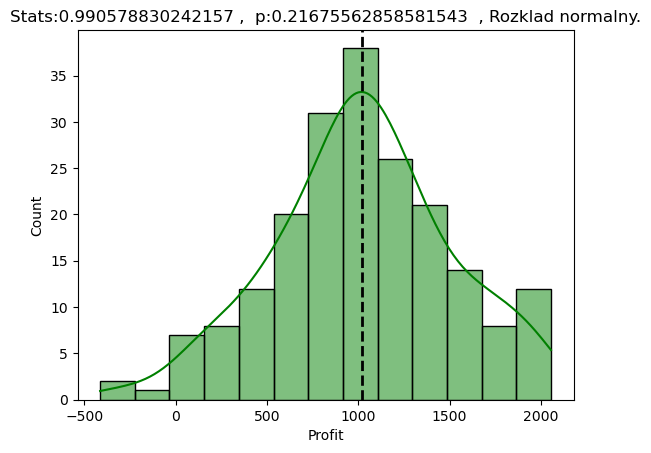

In [12]:
from scipy.stats import shapiro
import seaborn as sns

stat2, p2 = shapiro(data['Profit'])

if p2 > 0.05:
    s2 = 'Rozklad normalny.'
else:
    s2 = 'Nie jest rozkladem normalnym.'
    
sns.histplot(data['Profit'],kde=True, color='green')
plt.axvline(data['Profit'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Stats:"+ str(stat2)+" ,  p:" + str(p2)+ "  , " + s2)